In [ ]:
import tensorflow as tf

In [ ]:
#  학습될 가중치 변수를 선언
w = tf.Variable(4.0)
b = tf.Variable(1.0)

In [ ]:
# 가설을 함수로서 정의
@tf.function
def hypothesis(x):
  return w*x + b

In [ ]:
# 현재의 가설인 w = 4, b = 1일때의 결과
x_test = [3.5,5,5.5,6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [ ]:
@tf.function
def mse_loss(y_pred, y):
  # 두 개의 차이값을 제곱을 해서 평균을 취한다
  return tf.reduce_mean(tf.square(y_pred - y))

In [ ]:
# 데이터
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [ ]:
# 옵티마이저는 경사하강법 사용, 학습률 0.01
optimizer = tf.optimizers.SGD(0.01)

In [ ]:
# 300번에 걸쳐서 경사 하강법 수행
for i in range(301):
  with tf.GradientTape() as tape:
    # 연산 코드 tape에 저장 (역전파 알고리즘에 사용)

    # 현재 파라미터에 기반한 입력 x에 대한 예측값
    y_pred = hypothesis(x)

    # 평균 제곱 오차 계산
    cost = mse_loss(y_pred, y)

  # 손실 함수에 대한 파라미터의 미분값 계산
  gradient = tape.gradient(cost, [w,b])

  # 파라미터 업데이트
  optimizer.apply_gradients(zip(gradient, [w,b]))

  if i % 10 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))
    # w와 b의 값이 업데이트 됨에 따라 cost가 지속적으로 줄어듬

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328163
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306966
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252897
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223597
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [ ]:
# 학습된 w와 b의 값에 대해서 임의 입력을 넣은 경우
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


In [ ]:
# 케라스로 구현하는 선형 회귀

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [ ]:
model = Sequential()
# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim=1, activation='linear'))

# sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(lr=0.01)

# 손실 함수(Loss function)은 평균제곱오차 mse를 사용합니다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])

# 주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300)

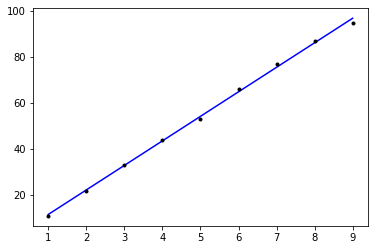

In [ ]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [ ]:
print(model.predict([9.5]))
# 9시간 30분을 공부했을 때 성적 예측

[[102.20445]]
